# SSQ

In [89]:
import pandas as pd

# Define the relative path to the CSV file
file_path = "../../../cleaned_data/questionnaire_df.csv"

questionnaire_df = pd.read_csv(file_path)

# Filter columns that contain "PERSONAL" or "SEQ" in their names
filtered_columns = [col for col in questionnaire_df.columns if "Controller" in col or "SSQ" in col]

# Create a new dataframe with the filtered columns
filtered_df = questionnaire_df[filtered_columns]


df = filtered_df
# Remove "PERSONAL_" prefix from all column names
df.columns = [col.replace("PERSONAL_", "") for col in df.columns]

# Replace "Chiron" with "SBC" in the "controller" column
df['Controller being tested?'] = df['Controller being tested?'].replace("Chiron", "SBC")

df.to_csv("ssq_raw.csv",index=False)

# Display the new dataframe
df.head()

<ipython-input-89-0b0199d05819>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Controller being tested?'] = df['Controller being tested?'].replace("Chiron", "SBC")


,Controller being tested?,SIM-WITH-VR_SSQ questions BEFORE the VR [General Discomfort],SIM-WITH-VR_SSQ questions BEFORE the VR [Fatigue],SIM-WITH-VR_SSQ questions BEFORE the VR [Headache],SIM-WITH-VR_SSQ questions BEFORE the VR [Eyestrain],SIM-WITH-VR_SSQ questions BEFORE the VR [Difficulty Focusing],SIM-WITH-VR_SSQ questions BEFORE the VR [Difficulty Concentrating],SIM-WITH-VR_SSQ questions BEFORE the VR [Blurred vision],SIM-WITH-VR_SSQ questions BEFORE the VR [Dizziness with eyes open],SIM-WITH-VR_SSQ questions BEFORE the VR [Fullness of head],...,RW-WITH-VR_SSQ questions BEFORE the VR [Fullness of head].1,RW-WITH-VR_SSQ questions AFTER the VR [General Discomfort].1,RW-WITH-VR_SSQ questions AFTER the VR [Fatigue].1,RW-WITH-VR_SSQ questions AFTER the VR [Headache].1,RW-WITH-VR_SSQ questions AFTER the VR [Eyestrain].1,RW-WITH-VR_SSQ questions AFTER the VR [Difficulty Focusing].1,RW-WITH-VR_SSQ questions AFTER the VR [Difficulty Concentrating].1,RW-WITH-VR_SSQ questions AFTER the VR [Blurred vision].1,RW-WITH-VR_SSQ questions AFTER the VR [Dizziness with eyes open].1,RW-WITH-VR_SSQ questions AFTER the VR [Fullness of head].1
0,SBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Slight,NaN,Slight,NaN,NaN,NaN,NaN,Slight
1,SBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Slight,Slight,NaN,NaN,NaN,NaN,NaN,Slight
2,SBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slight,NaN,Slight
4,SBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
import pandas as pd

# Load the SSQ raw data
ssq_data_path = "ssq_raw.csv"
ssq_data = pd.read_csv(ssq_data_path)

# Mapping symptom ratings to numerical values based on standard SSQ scoring
rating_map = {
    "None": 0,
    "Slight": 1,
    "Moderate": 2,
    "Severe": 3
}

# Adjusted symptom lists to match column names in dataset
nausea_symptoms = ["General Discomfort", "Fullness of head"]
oculomotor_symptoms = ["Fatigue", "Headache", "Eyestrain", "Difficulty Concentrating"]
disorientation_symptoms = ["Difficulty Focusing", "Blurred vision", "Dizziness with eyes open"]

# Mapping modality identifiers to dataset prefixes
modality_prefixes = {
    "Simulation before VR HMD": "SIM-WITH-VR_SSQ questions BEFORE the VR",
    "Simulation after VR HMD": "SIM-WITH-VR_SSQ questions AFTER the VR",
    "Real World before VR HMD": "RW-WITH-VR_SSQ questions BEFORE the VR",
    "Real World after VR HMD": "RW-WITH-VR_SSQ questions AFTER the VR"
}

# Dictionary to store computed SSQ statistics for each modality
ssq_statistics = {}

total_ssq_data = {}
nss_data = {}
oss_data = {}
dss_data = {}

for modality, prefix in modality_prefixes.items():
    # Extract relevant columns
    modality_columns = {col: col.split("[")[-1].split("]")[0] for col in ssq_data.columns if prefix in col}
    
    # Filter and rename columns for easier access
    modality_df = ssq_data[list(modality_columns.keys())].rename(columns=modality_columns)
    
    # Convert categorical ratings to numerical values
    modality_df = modality_df.applymap(lambda x: rating_map.get(x, 0))
    
    # Compute subscale sums
    N = modality_df[nausea_symptoms].sum(axis=1)
    O = modality_df[oculomotor_symptoms].sum(axis=1)
    D = modality_df[disorientation_symptoms].sum(axis=1)
    
    # Compute subscale scores
    NSS = N * 9.54
    OSS = O * 7.58
    DSS = D * 13.92

    # Compute total SSQ score
    total_SSQ = (N + O + D) * 3.74

    # Store statistics for this modality
    ssq_statistics[modality] = {
        "Total SSQ Mean": total_SSQ.mean(),
        "Total SSQ Median": total_SSQ.median(),
        "Total SSQ Min": total_SSQ.min(),
        "Total SSQ Max": total_SSQ.max(),
        "Total SSQ Std": total_SSQ.std(),
        "NSS Mean": NSS.mean(),
        "NSS Median": NSS.median(),
        "NSS Min": NSS.min(),
        "NSS Max": NSS.max(),
        "NSS Std": NSS.std(),
        "OSS Mean": OSS.mean(),
        "OSS Median": OSS.median(),
        "OSS Min": OSS.min(),
        "OSS Max": OSS.max(),
        "OSS Std": OSS.std(),
        "DSS Mean": DSS.mean(),
        "DSS Median": DSS.median(),
        "DSS Min": DSS.min(),
        "DSS Max": DSS.max(),
        "DSS Std": DSS.std()
    }
    
    total_ssq_data[modality] = total_SSQ
    nss_data[modality] = NSS
    oss_data[modality] = OSS
    dss_data[modality] = DSS

# Convert statistics to a DataFrame
ssq_statistics_df = pd.DataFrame(ssq_statistics).T

total_ssq_df = pd.DataFrame(total_ssq_data)
nss_df = pd.DataFrame(nss_data)
oss_df = pd.DataFrame(oss_data)
dss_df = pd.DataFrame(dss_data)

# Save each dataframe separately
total_ssq_df.to_csv("total_ssq.csv", index=False)
nss_df.to_csv("nss.csv", index=False)
oss_df.to_csv("oss.csv", index=False)
dss_df.to_csv("dss.csv", index=False)

In [99]:
oss_df.mean()

Simulation before VR HMD    0.379
Simulation after VR HMD     3.032
Real World before VR HMD    0.000
Real World after VR HMD     6.443
dtype: float64

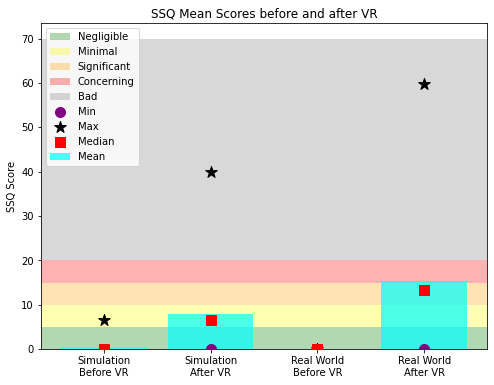

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the SSQ raw data
ssq_data_path = "ssq_raw.csv"


# Mapping symptom ratings to numerical values based on standard SSQ scoring
rating_map = {
    "None": 0,
    "Slight": 1,
    "Moderate": 2,
    "Severe": 3
}

# Adjusted symptom lists to match column names in dataset
nausea_symptoms = ["General Discomfort", "Fullness of head"]
oculomotor_symptoms = ["Fatigue", "Headache", "Eyestrain", "Difficulty Concentrating"]
disorientation_symptoms = ["Difficulty Focusing", "Blurred vision", "Dizziness with eyes open"]

# Mapping modality identifiers to dataset prefixes
modality_prefixes = {
    "Simulation before VR HMD": "SIM-WITH-VR_SSQ questions BEFORE the VR",
    "Simulation after VR HMD": "SIM-WITH-VR_SSQ questions AFTER the VR",
    "Real World before VR HMD": "RW-WITH-VR_SSQ questions BEFORE the VR",
    "Real World after VR HMD": "RW-WITH-VR_SSQ questions AFTER the VR"
}

# Dictionary to store computed SSQ statistics for each modality
ssq_statistics = {}

for modality, prefix in modality_prefixes.items():
    modality_columns = {col: col.split("[")[-1].split("]")[0] for col in ssq_data.columns if prefix in col}
    modality_df = ssq_data[list(modality_columns.keys())].rename(columns=modality_columns)
    modality_df = modality_df.applymap(lambda x: rating_map.get(x, 0))
    
    N = modality_df[nausea_symptoms].sum(axis=1)
    O = modality_df[oculomotor_symptoms].sum(axis=1)
    D = modality_df[disorientation_symptoms].sum(axis=1)
    
    NSS = N * 9.54
    OSS = O * 7.58
    DSS = D * 13.92
    total_SSQ = (N + O + D) * 6.65
    
    ssq_statistics[modality] = {
        "Total SSQ Mean": total_SSQ.mean(),
        "Total SSQ Median": total_SSQ.median(),
        "Total SSQ Min": total_SSQ.min(),
        "Total SSQ Max": total_SSQ.max(),
    }

# Extract data for plotting
modalities = list(ssq_statistics.keys())
means = [ssq_statistics[mod]["Total SSQ Mean"] for mod in modalities]
medians = [ssq_statistics[mod]["Total SSQ Median"] for mod in modalities]
mins = [ssq_statistics[mod]["Total SSQ Min"] for mod in modalities]
maxs = [ssq_statistics[mod]["Total SSQ Max"] for mod in modalities]

# Define x-axis labels with correct ordering
x_labels = [
    "Simulation\nBefore VR",
    "Simulation\nAfter VR",
    "Real World\nBefore VR",
    "Real World\nAfter VR"
]

# Adjust x-axis positions
x_pos = np.arange(len(modalities))

plt.figure(figsize=(8, 6))

# Define background color bands for different severity levels
plt.axhspan(0, 5, facecolor='green', alpha=0.3, label="Negligible")
plt.axhspan(5, 10, facecolor='yellow', alpha=0.3, label="Minimal")
plt.axhspan(10, 15, facecolor='orange', alpha=0.3, label="Significant")
plt.axhspan(15, 20, facecolor='red', alpha=0.3, label="Concerning")
plt.axhspan(20, 70, facecolor='gray', alpha=0.3, label="Bad")

# Plot mean scores as bars
plt.bar(x_pos, means, color='cyan', alpha=0.7, label="Mean")

# Overlay min, max, and median values
plt.scatter(x_pos, mins, color='purple', s=100, label="Min", zorder=3)
plt.scatter(x_pos, maxs, color='black', marker='*', s=150, label="Max", zorder=3)
plt.scatter(x_pos, medians, color='red', marker='s', s=100, label="Median", zorder=3)

# Labels and title
plt.xticks(x_pos, x_labels)
plt.ylabel("SSQ Score")
plt.title("SSQ Mean Scores before and after VR")
plt.legend(loc='upper left')

# Show plot
plt.show()


In [ ]:
####################### not working hereee

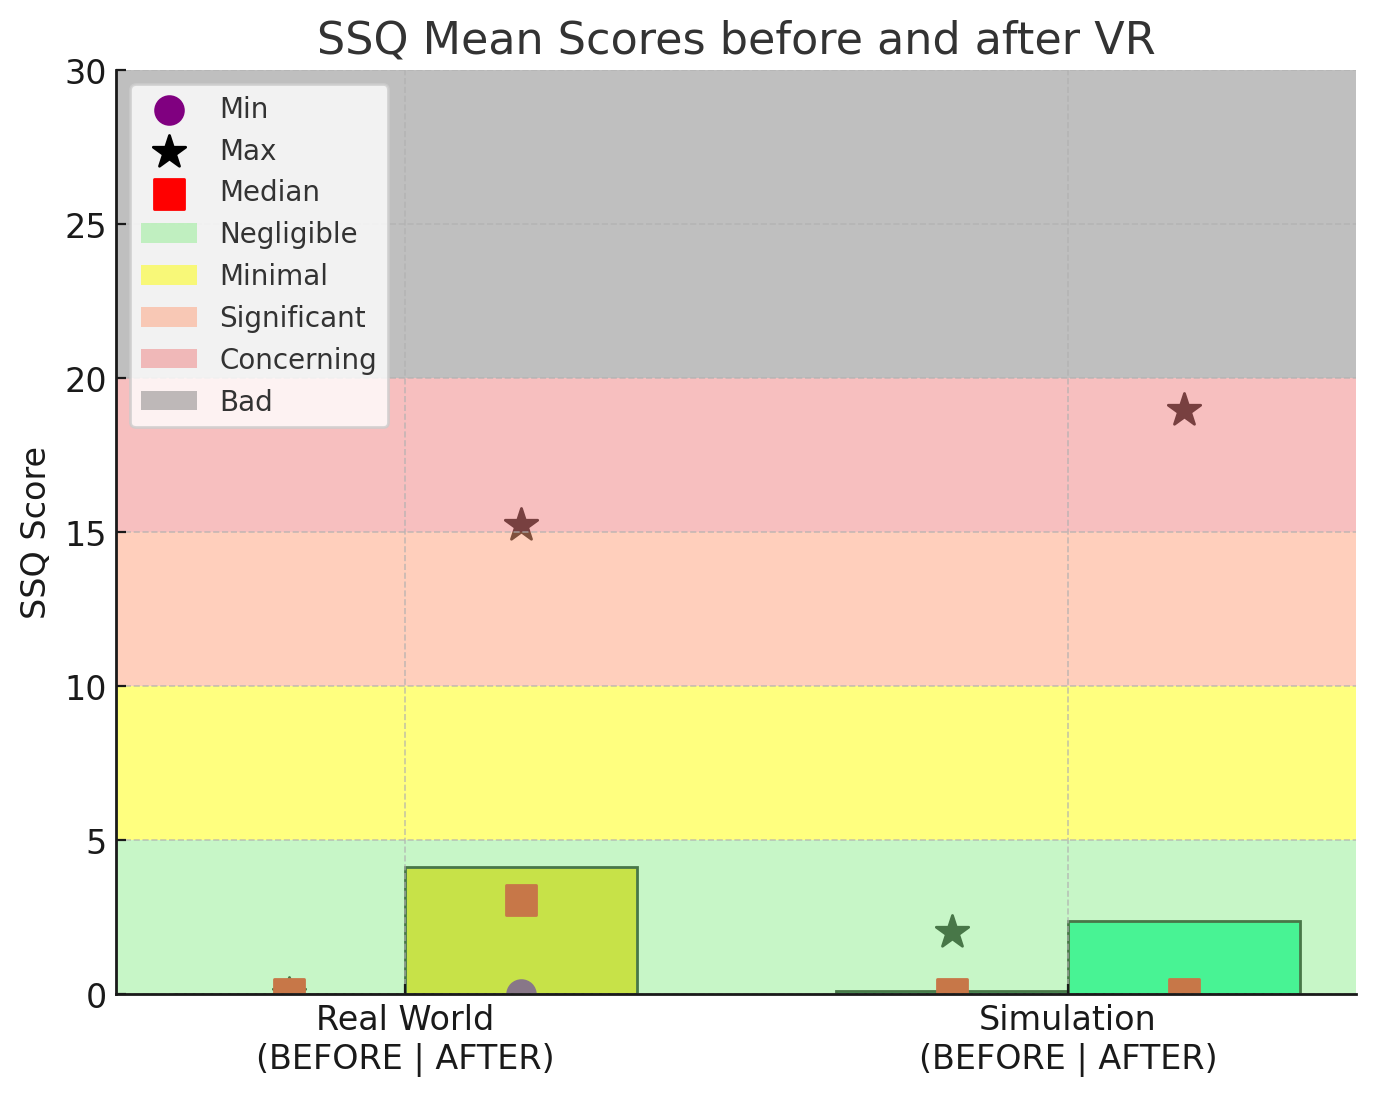